In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from scipy import signal

from PIL import Image

2023-03-07 11:19:30.093969: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-07 11:19:30.849664: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-07 11:19:30.849815: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-07 11:19:32.785013: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

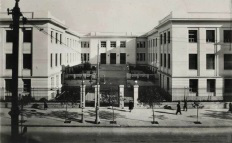

In [2]:
img = Image.open('../1940 το κτήριο.jpg')
display(img)

In [3]:
img_data = np.array(img)
img_data

array([[[201, 192, 185],
        [194, 185, 178],
        [194, 187, 179],
        ...,
        [200, 200, 190],
        [191, 191, 181],
        [165, 165, 155]],

       [[205, 196, 187],
        [188, 181, 171],
        [187, 180, 172],
        ...,
        [197, 197, 187],
        [188, 188, 178],
        [162, 162, 152]],

       [[196, 189, 179],
        [188, 181, 171],
        [190, 183, 173],
        ...,
        [198, 198, 188],
        [189, 189, 179],
        [164, 164, 154]],

       ...,

       [[ 84,  86,  75],
        [ 62,  63,  55],
        [ 56,  57,  49],
        ...,
        [ 80,  81,  76],
        [ 75,  76,  71],
        [ 61,  62,  57]],

       [[ 91,  93,  82],
        [ 65,  66,  58],
        [ 56,  57,  49],
        ...,
        [ 81,  82,  76],
        [ 75,  76,  70],
        [ 64,  65,  59]],

       [[ 93,  95,  84],
        [ 67,  68,  60],
        [ 57,  58,  50],
        ...,
        [ 70,  71,  65],
        [ 67,  68,  62],
        [ 64,  65,  59]]

In [4]:
img_data = img_data / np.max(img_data)
img_data.shape

(143, 232, 3)

In [5]:
img_data = img_data[:, :, 0]
img_data.shape

(143, 232)

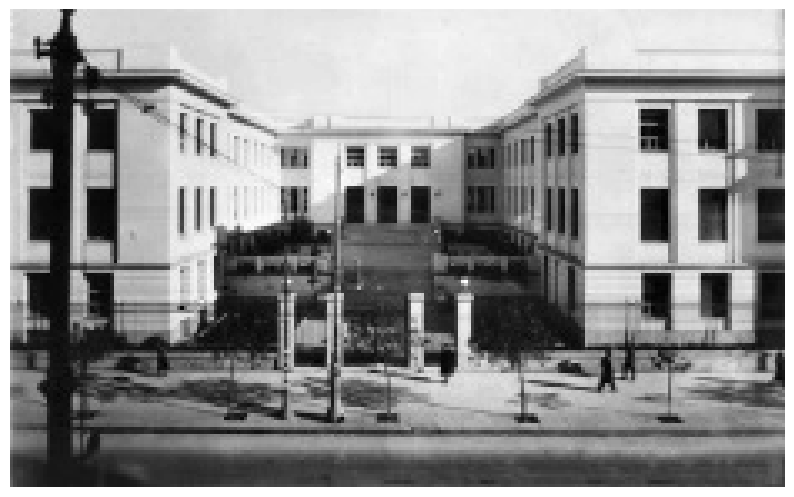

In [6]:
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(img_data, cmap='gray')

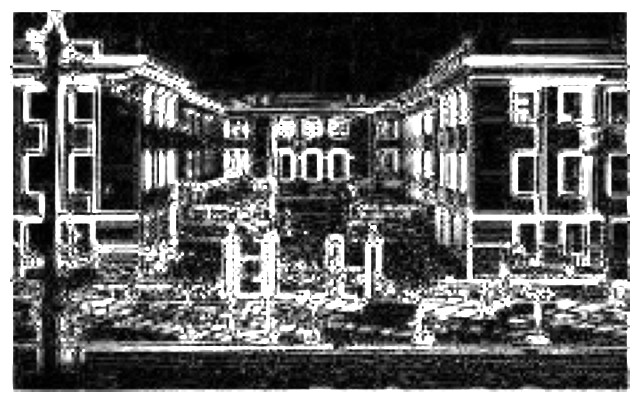

In [7]:
em = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])
edges = signal.convolve2d(img_data, em, boundary='fill', mode='same')
plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(np.absolute(edges), norm=matplotlib.colors.Normalize(0, 1), cmap='gray')

In [8]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 463s 3us/step


In [9]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
def display_cifar(rows, cols):
    plt.figure(figsize=(10, 10))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i][0]])

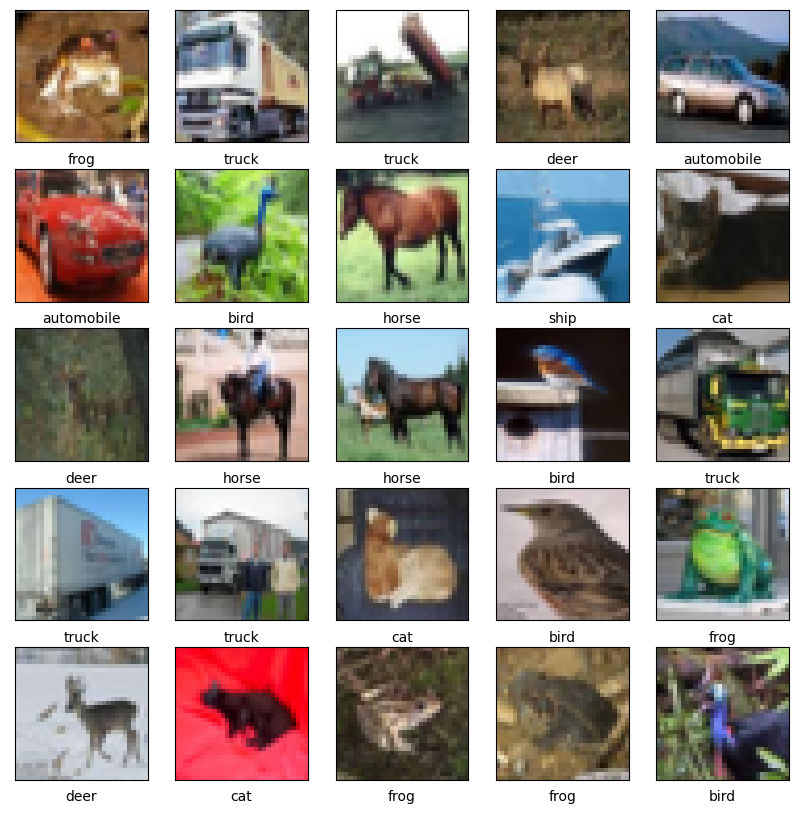

In [10]:
display_cifar(5, 5)

In [14]:
model = models.Sequential()
model.add(layers.Rescaling(1./255, input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [15]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 32, 32, 3)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)         

In [17]:
 model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 32, 32, 3)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)         

In [18]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10


2023-03-07 11:46:15.464685: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 122880000 exceeds 10% of free system memory.


1250/1250 [==============================] - 38s 29ms/step - loss: 1.6499 - accuracy: 0.3913 - val_loss: 1.3602 - val_accuracy: 0.5131
Epoch 2/10
1250/1250 [==============================] - 33s 26ms/step - loss: 1.2852 - accuracy: 0.5354 - val_loss: 1.2119 - val_accuracy: 0.5704
Epoch 3/10
1250/1250 [==============================] - 34s 27ms/step - loss: 1.1208 - accuracy: 0.5982 - val_loss: 1.0736 - val_accuracy: 0.6162
Epoch 4/10
1250/1250 [==============================] - 35s 28ms/step - loss: 1.0136 - accuracy: 0.6427 - val_loss: 1.0668 - val_accuracy: 0.6292
Epoch 5/10
1250/1250 [==============================] - 35s 28ms/step - loss: 0.9329 - accuracy: 0.6701 - val_loss: 0.9889 - val_accuracy: 0.6546
Epoch 6/10
1250/1250 [==============================] - 37s 29ms/step - loss: 0.8674 - accuracy: 0.6946 - val_loss: 0.9956 - val_accuracy: 0.6543
Epoch 7/10
1250/1250 [==============================] - 35s 28ms/step - loss: 0.8136 - accuracy: 0.7166 - val_loss: 0.8986 - val_accura

In [19]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,accuracy,val_loss,val_accuracy,epoch
0,1.649864,0.391325,1.360220,0.5131,0
1,1.285165,0.535400,1.211900,0.5704,1
2,1.120770,0.598200,1.073642,0.6162,2
3,1.013621,0.642725,1.066817,0.6292,3
4,0.932941,0.670125,0.988903,0.6546,4
5,0.867420,0.694575,0.995581,0.6543,5
6,0.813642,0.716625,0.898583,0.6876,6
7,0.766342,0.729975,0.887222,0.7016,7
8,0.723764,0.745025,0.911146,0.6881,8
9,0.683946,0.757925,0.910518,0.6958,9


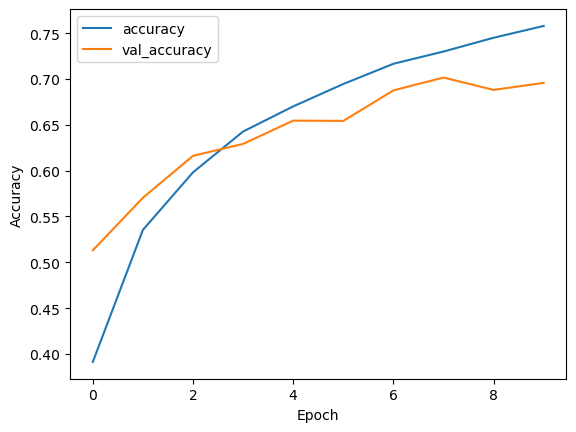

In [20]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print('test loss:', test_loss, 'test accuracy:', test_acc)

313/313 - 2s - loss: 0.9227 - accuracy: 0.6959 - 2s/epoch - 6ms/step
test loss: 0.9227107167243958 test accuracy: 0.695900022983551
